<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import lognorm, norm, expon, weibull_min

# **CASE: Vendas Diárias**

As vendas diárias de uma loja têm média de R$ 5000. Em geral o volume de vendas tem uma distribuição *lognorm*. O valor do *desvio padrão da distribuição lognormal* é 0.5 (note, este é *s*, *shape* da distribuição lognorm).



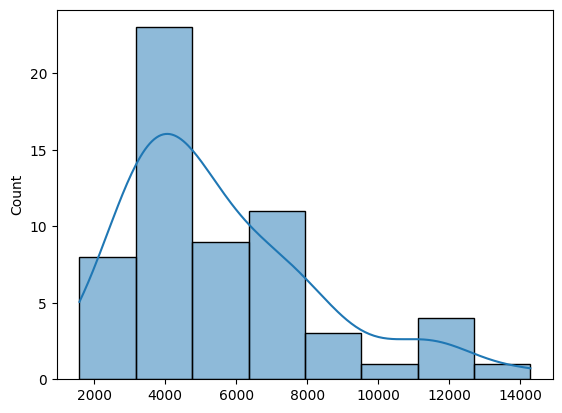

array([11263.9864252 ,  3682.38155891,  3839.53795946,  2924.00309789,
        7707.09803598,  1581.96629529, 11963.30196612,  3417.24428614,
        5864.73595401,  4413.87383583])

In [ ]:
np.random.seed(1)
x = lognorm.rvs(s=0.5, scale=5000, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

In [ ]:
shape, loc, scale = lognorm.fit(x, floc=0)  # floc=0 força o deslocamento (loc) a ser 0
shape, loc, scale


(0.4632259381029043, 0, 5020.82910233391)

# Q2A.

Qual a probabilidade das vendas ficarem abaixo de R$ 3000.




In [ ]:
lognorm.cdf(3000,s=0.5,scale=5000)

0.15347299656473

# Q2B.

Qual a probabilidade das vendas ficarem acima de R$ 8000.




In [ ]:
1 - lognorm.cdf(8000,s=0.5,scale=5000)

0.17360691875027223

# Q2C.

Qual o valor mínimo que você pode esperar vender em 90% dos dias? (renda mínima garantida)




In [ ]:
lognorm.ppf(1 - 0.9,s=0.5,scale=5000)

2634.4175914801826

# **CASE: Fila de Atendimento**

A fila de atendimento de um serviço de saúde tem nos finais de semana taxa de chegada de 3 pacientes por hora e taxa de atendimento (serviço) de 4 pacientes por hora. Filas desse tipo são modeladas com distribuição exponencial (poisson).

Dica: Empregue `mean_time_in_system = 1 / (mu_service - lambda_arrival)` para sua distribuição, e sempre `mu_service > lambda_arrival`.



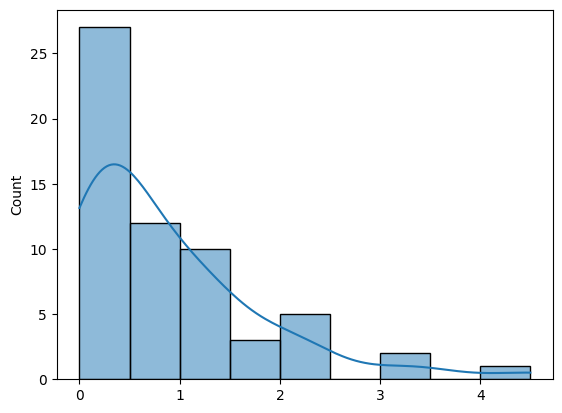

array([5.39605837e-01, 1.27412525e+00, 1.14381359e-04, 3.60012755e-01,
       1.58709595e-01, 9.68838717e-02, 2.06114634e-01, 4.23976482e-01,
       5.05452542e-01, 7.73959775e-01])

In [ ]:
np.random.seed(1)
mean_time_in_system = 1 / (4 - 3)

x = expon.rvs(scale=mean_time_in_system, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

# Q3A.

Qual a probabilidade de espera de até 1h na fila de atendimento?

In [ ]:
expon.cdf(1, scale=mean_time_in_system)

0.6321205588285577

# Q3B.

Qual a probabilidade de espera de mais de 1h na fila de atendimento?

In [ ]:
1 - expon.cdf(1, scale=mean_time_in_system)

0.36787944117144233

# Q3C.

O setor precisa garantir, para não ter penalidades, que 90% dos atendimentos são realizados em menos de 2h. O setor está atendendo essa demanda?

In [ ]:
expon.ppf(0.90, scale=mean_time_in_system)

2.302585092994046

# Q3D.

Qual o percentual de pacientes atendidos entre 1h e 2h de atendimento?

In [ ]:
(1 - expon.cdf(1, scale=mean_time_in_system)) - (1 - expon.cdf(2, scale=mean_time_in_system))

0.23254415793482963

# **CASE: Falha de Peças com Desgaste**

Uma peça do trem de pouso de uma aeronave tem uma vida útil de 5000 horas e uma taxa de falhas crescente ao longo do tempo estimada em 1.5.

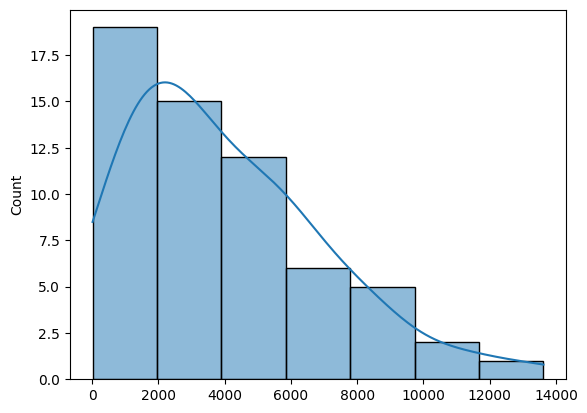

array([3314.01469915, 5876.40094596,   11.78166957, 2530.35776144,
       1465.67875777, 1054.72116597, 1744.65364761, 2821.83218212,
       3172.66044575, 4214.8513656 ])

In [ ]:
np.random.seed(1)
lambda_scale = 5000  # escala, vida média em horas
k_shape = 1.5  # forma, <1 pouquissímas falhas, =1 taxa constante (exponencial), >1.5 taxa aumenta, modelando por exemplo desgaste

x = weibull_min.rvs(c=k_shape, scale=lambda_scale, size=60)
sns.histplot(x, kde=True)
plt.show()
x[0:10]

# Q4A.

Qual a probabilidade de falha dessa peça em menos de 1000h?

In [ ]:
weibull_min.cdf(1000,c=k_shape, scale=lambda_scale)

0.08555935639278299

# Q4B.

Você tem 500 peças que foram compradas e instaladas em um lote único (mesma data). Considerando 2000h (cerca de 90 dias), qual estoque de reposição precisa haver para garantir cobrir 90 das falhas nessas próximas 2000h?

In [ ]:
weibull_min.cdf(2000,c=k_shape,scale=lambda_scale) * 500

111.7591534371911

# Q4C.

Qual o tempo de vida dos 10% de peças que apresentam falhas mais cedo?  

In [ ]:
weibull_min.ppf(0.1,c=k_shape,scale=lambda_scale)

1115.3776281845855